# Synthetic Malaysia License Plate 

## Generate background image
Notice the background images' size are too large for normal license plate ratio. We would crop out the plate ROI after the license plate generation.

In [1]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

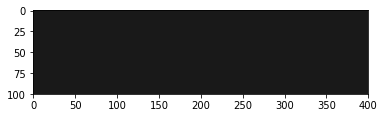

In [2]:
plate_0_background = Image.new('RGB', (400,100), (25, 25, 25))
plt.imshow(plate_0_background)

Save the background locally

In [3]:
plate_0_background.save('/home/git_local/my_1.jpg')

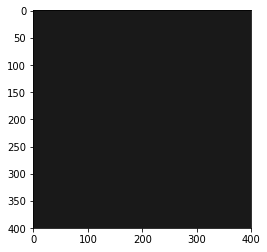

In [4]:
plate_1_background = Image.new('RGB', (400,400), (25, 25, 25))
plt.imshow(plate_1_background)

Save the background locally

In [5]:
plate_1_background.save('/home/git_local/my_1_c.jpg')

Keep both plate background in list

In [4]:
plate_background = [plate_0_background, plate_1_background]

## Generate license plate character
Generate random license plate string using pillow function

In [47]:
import random
import urllib.request
from zipfile import ZipFile 

Download Fonts

In [ ]:
url='https://dl.dafont.com/dl/?f=old_sans_black'
data = response.read()

In [6]:
char = chr(random.randint(65,90))
digit = chr(random.randint(48, 57))

In [7]:
def prefix(str_num):
    char = str(chr(random.randint(65,90)))
    for j in range(str_num-1):
        char += str(chr(random.randint(65,90)))
    return char

In [8]:
def digits(dig_num):
    digit = str(chr(random.randint(48,57)))
    for j in range(2):
        digit += str(chr(random.randint(48,57)))
    return digit

In [9]:
def three_prefix():
    pfx = prefix(str_num=3)
    digit = digits(dig_num=4)
    plate = pfx + ' ' + digit
    return plate

In [10]:
def text_contruction(draw, font, text, img_w, img_h, draw_w, draw_h):
    draw.text(xy=((((img_w - draw_w) / 2)-1), ((img_h - draw_h) / 2)-1), text=text, fill=(10, 10, 10), font=font, align="center")
    draw.text(xy=((((img_w - draw_w) / 2)+1), ((img_h - draw_h) / 2)-1), text=text, fill=(10, 10, 10), font=font, align="center")
    draw.text(xy=((((img_w - draw_w) / 2)+1), ((img_h - draw_h) / 2)+1), text=text, fill=(10, 10, 10), font=font, align="center")
    draw.text(xy=((((img_w - draw_w) / 2)-1), ((img_h - draw_h) / 2)+1), text=text, fill=(10, 10, 10), font=font, align="center")
    draw.text(xy=((img_w - draw_w) / 2, (img_h - draw_h) / 2), text=text, fill=(248, 248, 248), font=font, align="center")
    return

In [23]:
 def plate_image(plate):
    background = random.choice(plate_background)
    img = background
    img_w, img_h = img.size
    font_ = "/home/EasyOCRGen/fonts/msia/Arial_Condensed_Bold.ttf"
    # print(len(chr(plate[word_index])))
    font = ImageFont.truetype(font=font_, size=18)
    draw = ImageDraw.Draw(img)
    draw_w, draw_h = draw.textsize(plate, font=font)
    if img_w / img_h > 2:
        text_contruction(draw, font, plate, img_w, img_h, draw_w, draw_h)
        # draw.text(xy=((img_w-draw_w)/2, (img_h-draw_h)/2), text=plate[word_index], font=font, align="center")
    else:
        plate1 = plate.split(maxsplit=1)[0] + '\n' + plate.split(maxsplit=1)[1]
        text_contruction(draw, font, plate1, img_w, img_h, draw_w, draw_h)
        # draw.text(xy=((img_w - draw_w) / 2, (img_h - draw_h) / 2), text=plate[word_index], font=font,
        #           align="center")
        
    return img

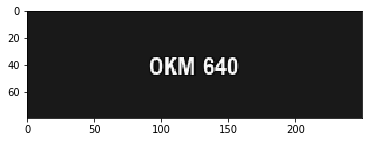

In [24]:
plate = three_prefix()
img = plate_image(plate)
plt.imshow(img)

# Crop out license plate ROI
To crop out the ROI region of the oversized license plate

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imgaug import augmenters as iaa

Convert RGB to BGR. BGR is OpenCV image channel sequence.

In [28]:
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

In [29]:
img_y, img_x, img_c = img.shape

## Data Augmentation: Image perspective transform
Simulate different view point of the camera to the license plate in real world 

In [30]:
def img_pers_trans(img, p1=0.1, p2=0.1):
    seq = iaa.Sequential([iaa.PerspectiveTransform(scale = (p1,p2), deterministic = True, keep_size = True)])
    img_aug = seq.augment_image(img)
    return img_aug

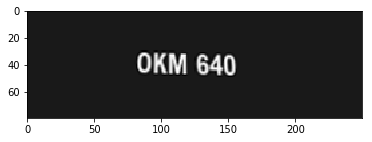

In [31]:
img = img_pers_trans(img)
plt.imshow(img)

## Finding the contours of ROI
First we dilate (Black background) with small kernel and high iteration, for a more precise contour around the character. Compare all pair **'X'** and **'Y'** of contour. Assuming the **top left point is the smallest X and Y** and the **bottom right point is the biggest X and Y**. 

In [32]:
def dilate(img):
    kernel = np.ones((3,3), np.uint8)
    img_roi = cv2.dilate(img, kernel, iterations=7)
    return img_roi

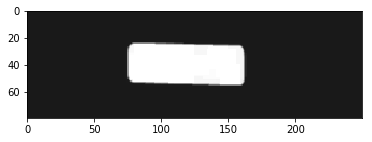

In [33]:
img_roi = dilate(img)
plt.imshow(img_roi)

### Grayscale, Thresholding & Contours
Standard practice of finding image contours: Apply thresholding.

In [34]:
imgray = cv2.cvtColor(img_roi, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [35]:
contours

[array([[[ 80,  24]],
 
        [[ 79,  25]],
 
        [[ 78,  25]],
 
        [[ 76,  27]],
 
        [[ 76,  29]],
 
        [[ 75,  30]],
 
        [[ 75,  48]],
 
        [[ 76,  49]],
 
        [[ 76,  51]],
 
        [[ 77,  52]],
 
        [[ 78,  52]],
 
        [[ 79,  53]],
 
        [[104,  53]],
 
        [[105,  54]],
 
        [[143,  54]],
 
        [[144,  55]],
 
        [[158,  55]],
 
        [[159,  54]],
 
        [[160,  54]],
 
        [[161,  53]],
 
        [[161,  52]],
 
        [[162,  51]],
 
        [[162,  34]],
 
        [[161,  33]],
 
        [[161,  29]],
 
        [[160,  28]],
 
        [[160,  27]],
 
        [[159,  27]],
 
        [[158,  26]],
 
        [[125,  26]],
 
        [[124,  25]],
 
        [[ 95,  25]],
 
        [[ 94,  24]]], dtype=int32)]

In [36]:
con = cv2.drawContours(img_roi, contours, -1, (0, 0, 255), 3)

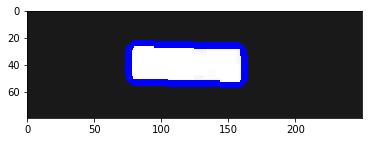

In [37]:
plt.imshow(con)

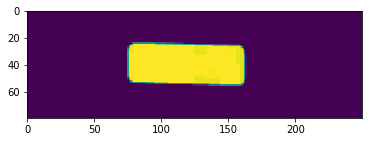

In [38]:
plt.imshow(imgray)

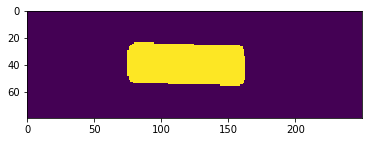

In [39]:
plt.imshow(thresh)

### Select suitable contours
There are usually more than one contour in a image. Since roi drew from erode/dilate has more complicated shape from the others, we select the contour with more points as our target contour. 

In [40]:
def contour_hunter(contours):
    con = []
    con_count = len(contours)
    for count, point in enumerate(contours):
        print('Contour count: {}'.format(count))
        print('Contour points: {}'.format(len(point)))
        con.append(len(point))
    target_con = np.argmax(con)
    return target_con

In [41]:
con_points = []
x_points = []
y_points = []
target_contour = contour_hunter(contours)

for x in contours[target_contour]:
    add = np.sum(x)
    y_points.append(x[0][1])
    x_points.append(x[0][0])
    con_points.append(add)

Contour count: 0
Contour points: 33


## Finding actual cutting point of ROI
Find the actual smallest and biggest X and Y from the contour.

In [42]:
x_min_abs = x_points[np.argmin(x_points)]
x_max_abs = x_points[np.argmax(x_points)]
y_min_abs = y_points[np.argmin(y_points)]
y_max_abs = y_points[np.argmax(y_points)]
x_min_abs, x_max_abs, y_min_abs, y_max_abs

(75, 162, 24, 55)

## Slice out the license plate ROI

In [43]:
vlp_img = img[y_min_abs:y_max_abs, x_min_abs:x_max_abs]

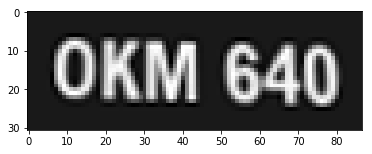

In [44]:
plt.imshow(vlp_img)

Save final plate image locally

In [ ]:
cv2.imwrite('/home/tunnel/'+plate.replace(' ', '') + '.jpg', vlp_img)

## Data Augmentation: Image channel invert
Malaysia license plate has white and black background

In [ ]:
def img_color_invert(img):
    seq = iaa.Sequential([iaa.Invert(1, per_channel=False)])
    img1=np.transpose(img,(2,0,1))
    img_aug1 = seq.augment_images(img1)
    img_aug=np.transpose(img_aug1,(1,2,0))
    return img_aug

In [ ]:
img = img_color_invert(img)
plt.imshow(img)